# Importing Libraries

In [1]:
from importlib import import_module
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time

#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#importing oneHotEncoder and column transformer for converting text to numeric data and transforming the columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing all the regressors

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

# Importing dataset and creating X and y's for training and testing

In [3]:
agds = pd.read_csv("data/agriculturalDataset.csv")
agds["area"].fillna(agds["area"].mean(),
                                     inplace=True)

X = agds.drop(["aus", "aman", "boro", "wheat", "potato", "jute"], axis = 1)
aus_y = agds["aus"]
aman_y = agds["aman"]
boro_y = agds["boro"]
wheat_y = agds["wheat"]
potato_y = agds["potato"]
jute_y = agds["jute"]

# Transforming columns which holds string values

In [4]:
#transforming our dataframe cells which have text values, converting them to numbers
categorical_features = ["District", "storm"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)

# Create Train and Test data
## List of target
* Aus
* Aman
* Boro
* Wheat
* Potato
* Jute

In [54]:
#Creating train data and test data

aus_X_train, aus_X_test, aus_y_train, aus_y_test = train_test_split(transformed_X, aus_y, test_size=0.2)
aman_X_train, aman_X_test, aman_y_train, aman_y_test = train_test_split(transformed_X, aman_y, test_size=0.2)
boro_X_train, boro_X_test, boro_y_train, boro_y_test = train_test_split(transformed_X, boro_y, test_size=0.2)
wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test = train_test_split(transformed_X, wheat_y, test_size=0.2)
potato_X_train, potato_X_test, potato_y_train, potato_y_test = train_test_split(transformed_X, potato_y, test_size=0.2)
jute_X_train, jute_X_test, jute_y_train, jute_y_test = train_test_split(transformed_X, jute_y, test_size=0.2)

# Creating a dictionary of models
## Result for each target
### Execution time for each taeget

In [25]:
models = {"RandomForestRegressor": RandomForestRegressor(),
         "KNeighborsRegressor": KNeighborsRegressor(),
         "GradientBoostingRegressor": GradientBoostingRegressor(),
         "AdaBoostRegressor": AdaBoostRegressor(),
         "DecisionTreeRegressor": DecisionTreeRegressor()}

accuracy = {"aus": {},
            "aman": {},
            "boro": {},
            "wheat": {},
            "potato": {},
            "jute": {}}

exec_time = {"aus": {},
            "aman": {},
            "boro": {},
            "wheat": {},
            "potato": {},
            "jute": {}}
models, accuracy, exec_time

({'RandomForestRegressor': RandomForestRegressor(),
  'KNeighborsRegressor': KNeighborsRegressor(),
  'GradientBoostingRegressor': GradientBoostingRegressor(),
  'AdaBoostRegressor': AdaBoostRegressor(),
  'DecisionTreeRegressor': DecisionTreeRegressor()},
 {'aus': {}, 'aman': {}, 'boro': {}, 'wheat': {}, 'potato': {}, 'jute': {}},
 {'aus': {}, 'aman': {}, 'boro': {}, 'wheat': {}, 'potato': {}, 'jute': {}})

# Function to get accuracy score and Execution time

In [52]:
def trainTestEx(models, X_train, X_test, y_train, y_test, name):
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    exec_time[name][model_name] = (end_time - start_time)
    accuracy[name][model_name] = model.score(X_test, y_test)

# Function to plot Accuracy comparison bar

In [17]:
def accuracyDataFrame(resultOfAccuracy, name):
  dataframe_of_aus_accuracy_result = pd.DataFrame(resultOfAccuracy.values(),
                          resultOfAccuracy.keys(),
                          columns=["Accuracy for {}".format(name)])
  dataframe_of_aus_accuracy_result.plot.bar();

# Function to plot Execution comparison bar

In [19]:
def executionDataFrame(resultOfexecution, name):
  dataframe_of_aus_execution_result = pd.DataFrame(resultOfexecution.values(),
                          resultOfexecution.keys(),
                          columns=["Excecution for {}".format(name)])
  dataframe_of_aus_execution_result.plot.bar();

# Training and Testing models (Aus)

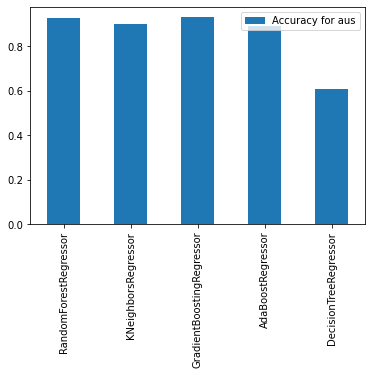

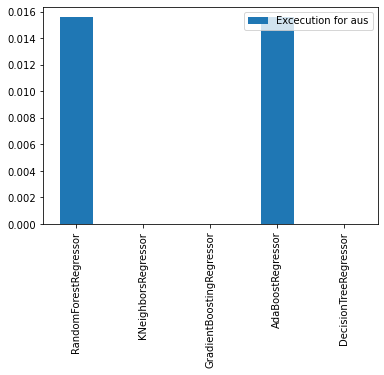

In [27]:
name = "aus"

trainTestEx(models, aus_X_train, aus_X_test, aus_y_train, aus_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Aman)

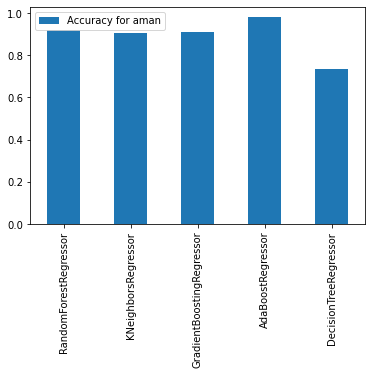

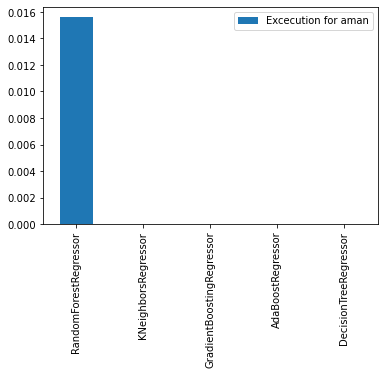

In [39]:
name = "aman"

trainTestEx(models, aman_X_train, aman_X_test, aman_y_train, aman_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Boro)

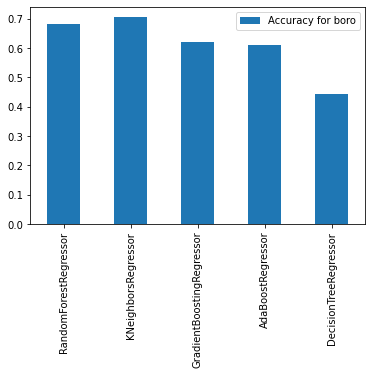

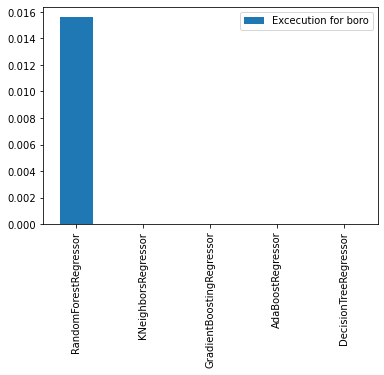

In [53]:
name = "boro"

trainTestEx(models, boro_X_train, boro_X_test, boro_y_train, boro_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Wheat)

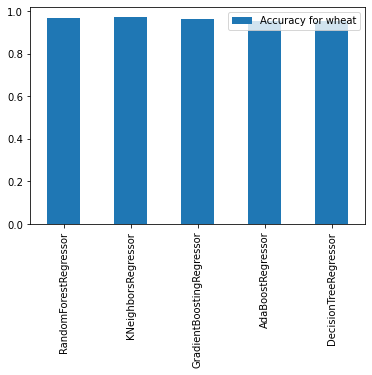

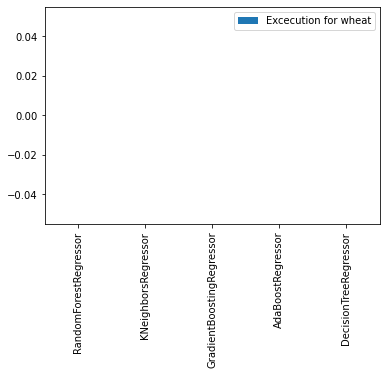

In [56]:
name = "wheat"

trainTestEx(models, wheat_X_train, wheat_X_test, wheat_y_train, wheat_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Potato)

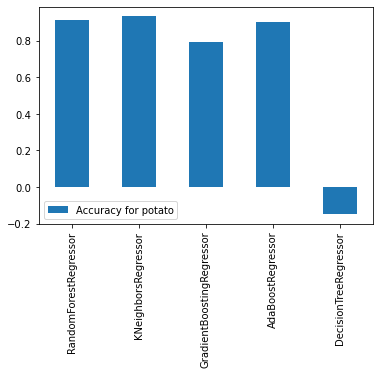

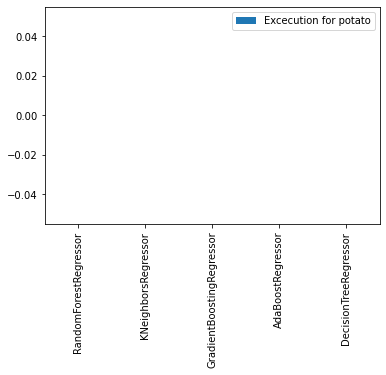

In [58]:
name = "potato"

trainTestEx(models, potato_X_train, potato_X_test, potato_y_train, potato_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

# Training and Testing models (Jute)

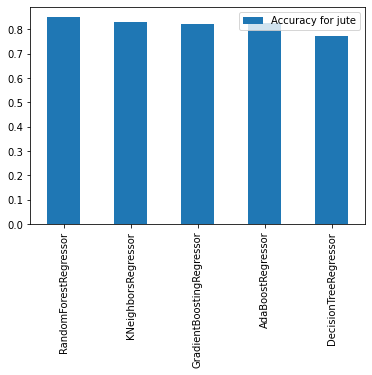

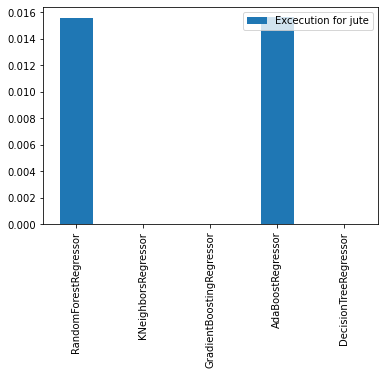

In [59]:
name = "jute"

trainTestEx(models, jute_X_train, jute_X_test, jute_y_train, jute_y_test, name)

accuracyDataFrame(accuracy[name], name)

#something

executionDataFrame(exec_time[name], name)

In [64]:
from sklearn.metrics import mean_absolute_error

prediction_rfc_aus = models["RandomForestRegressor"].predict(aus_X_test)
prediction_rfc_aus, aus_y_test

mae = mean_absolute_error(aus_y_test, prediction_rfc_aus)

mae

47949.165

In [65]:
com_rfc_aus_df = pd.DataFrame(data={"actual value": aus_y_test,
                                   "predicted value": prediction_rfc_aus})

com_rfc_aus_df

,actual value,predicted value
35,752,57681.59
40,75085,85255.82
29,4103,8102.39
47,63482,73629.33
24,1003,3124.58
61,57140,76062.08
0,804,62687.75
67,1545,199512.83
59,327,4366.08
37,493,39584.35
